# The Discrete Fourier Transform

*This Jupyter notebook is part of a [collection of notebooks](../index.ipynb) in the bachelors module Signals and Systems, Comunications Engineering, Universität Rostock. Please direct questions and suggestions to [Sascha.Spors@uni-rostock.de](mailto:Sascha.Spors@uni-rostock.de).*

## Theorems

The theorems of the discrete Fourier transform (DFT) relate basic operations applied to discrete signals to their equivalents in the spectral domain. They are of use to transform signals composed from modified [standard signals](../discrete_signals/standard_signals.ipynb), for the computation of the response of a linear time-invariant (LTI) system and to predict the consequences of modifying a signal or system by certain operations.

### Convolution Theorem

The DFT $X[\mu] = \text{DFT}_N \{ x[k] \}$ and its inverse $x[k] = \text{IDFT}_N \{ X[\mu] \}$ are both periodic with period $N$. The linear convolution of two periodic signals is not defined. The periodic convolution introduced in the following is used instead for the convolution theorem of the DFT.

#### Periodic Convolution

The [periodic (or circular/cyclic) convolution](https://en.wikipedia.org/wiki/Circular_convolution) of two finite-length signals $x[k]$ and $h[k]$ is defined as

\begin{equation}
x[k] \circledast_P h[k] = \sum_{\kappa=0}^{P-1} \tilde{x}_P[k - \kappa] \; \tilde{h}_P[\kappa] =
\sum_{\kappa=0}^{P-1} \tilde{x}_P[\kappa] \; \tilde{h}_P[k - \kappa]
\end{equation}

where $\circledast_P$ denotes the periodic convolution with period $P$. The periodic summations $\tilde{x}_P[k]$ of $x[k]$ and $\tilde{h}_P[k]$ of $h[k]$ with period $P$ are defined as

\begin{align}
\tilde{x}_P[k] &= \sum_{\nu = -\infty}^{\infty} x[\nu \cdot P + k] \\
\tilde{h}_P[k] &= \sum_{\nu = -\infty}^{\infty} h[\nu \cdot P + k]
\end{align}

The result of the circular convolution has a period of $P$. The periodic convolution of two signals is in general different to their linear convolution.

For the special case that the length of one or both of the signals $x[k]$ and $h[k]$ is smaller or equal to the period $P$, the periodic summation degenerates to a periodic continuation of the signal(s). Furthermore, the periodic continuation does only have to be performed for the shifted signal in above convolution sum. For this special case, the periodic convolution is often termed as **cyclic convolution**.

**Example - Periodic vs. linear convolution**

The periodic $y_1[k] = x[k] \circledast_P h[k]$ and linear $y_2[k] = x[k] * h[k]$ convolution of two rectangular signals $x[k] = \mathrm{rect}_M[k]$ and $h[k] = \mathrm{rect}_N[k]$ is numerically evaluated. For this purpose helper functions are defined that implement the periodic summation and convolution.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


def periodic_summation(x, P):
    'Zero-padding to length P or periodic summation with period P.'
    N = len(x)
    rows = int(np.ceil(N/P))

    if (N < int(P*rows)):
        x = np.pad(x, (0, int(P*rows-N)), 'constant')

    x = np.reshape(x, (rows, P))

    return np.sum(x, axis=0)


def periodic_convolve(x, y, P):
    'Periodic convolution of two signals x and y with period P.'
    x = periodic_summation(x, P)
    h = periodic_summation(y, P)

    return np.array([np.dot(np.roll(x[::-1], k+1), h) for k in range(P)], float)

Now the signals are defined, the convolutions are computed and the signals plotted. Note, for the periodic signals $\tilde{x}_P[k]$ and $y_1[k]$ only one period is shown.

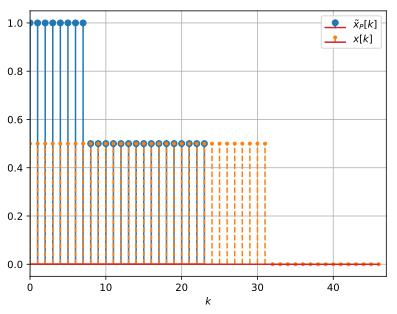

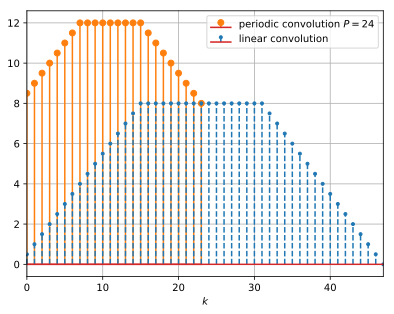

In [2]:
M = 32  # length of signal x[k]
N = 16  # length of signal h[k]
P = 24  # period of periodic convolution


def rect(k, N):
    return np.where((0 <= k) & (k < N), 1.0, 0.0)


# generate signals
k = np.arange(M+N-1)
x = .5 * rect(k, M)
h = rect(k, N)

# periodic convolution
y1 = periodic_convolve(x, h, P)
# linear convolution
y2 = np.convolve(x, h, 'full')

# plot results
plt.figure()
plt.stem(periodic_summation(x, P), linefmt='C0-',
         markerfmt='C0o', label=r'$\tilde{x}_P[k]$')
plt.stem(x, linefmt='C1--', markerfmt='C1.', label=r'$x[k]$')
plt.xlabel(r'$k$')
plt.xlim([0, M+N-1])
plt.legend()
plt.grid()

plt.figure()
plt.stem(y1, linefmt='C1-', markerfmt='C1o',
         label=r'periodic convolution $P={}$'.format(P))
plt.stem(y2, linefmt='C0--', markerfmt='C0.', label=r'linear convolution')
plt.xlabel(r'$k$')
plt.xlim([0, M+N-1])
plt.legend()
plt.grid()

**Exercise**

* Change the length $M$ of the rectangular signal $x[k]$. How does the result of the periodic convolution change?
* Compare the result of the periodic convolution with the result of the linear convolution. For which values of $P$ are both the same?

#### Convolution Theorem

The convolution theorem states that the DFT of the cyclic convolution of two discrete signals $x[k]$ and $y[k]$ is equal to the scalar multiplication of their DFTs $X[\mu] = \text{DFT}_N \{ x[k] \}$ and $Y[\mu] = \text{DFT}_N \{ y[k] \}$

\begin{equation}
\text{DFT}_N \{ x[k] \circledast_N y[k] \} = X[\mu] \cdot Y[\mu]
\end{equation}

for $k, \mu =0,1, \dots, N-1$.

The theorem can be proven by introducing the definition of the periodic convolution into the [definition of the DFT](definition.ipynb) and changing the order of summation

\begin{align}
\text{DFT}_N \{ x[k] \circledast_N y[k] \} &= \sum_{k = 0}^{N-1} \left( \sum_{\kappa = 0}^{N-1} \tilde{x}_N[\kappa] \cdot \tilde{y}_N[k - \kappa] \right) w_N^{\mu k}  \\
&= \sum_{\kappa = 0}^{N-1} \left( \sum_{k = 0}^{N-1} \tilde{y}_N[k - \kappa] \, w_N^{\mu k} \right) \tilde{x}_N[\kappa] \\
&= Y[\mu] \cdot \sum_{\kappa = 0}^{N-1} \tilde{x}_N[\kappa] \, w_N^{\mu \kappa} \\
&= Y[\mu] \cdot X[\mu]
\end{align}

Note, $\text{DFT}_N \{ x[k] \} = \text{DFT}_N \{ \tilde{x}_N[k] \}$ due to the periodicity of the DFT.
It can be concluded from the convolution theorem that a scalar multiplication of the two spectra results in a cyclic convolution of the corresponding signals. For a linear time-invariant (LTI) system, the output signal is given as the linear convolution of the input signal $x[k]$ with the impulse response $h[k] = \mathcal{H} \{ \delta[k] \}$. The convolution theorem cannot be applied straightforward to the computation of the output signal of an LTI system. The [fast convolution technique](fast_convolution.ipynb), introduced later, provides an efficient algorithm for the linear convolution of two signals based on the convolution theorem.

### Shift Theorem

Since the convolution theorem of the DFT is given in terms of the cyclic convolution, the shift theorem of the DFT is given in terms of the periodic shift. The [periodic (circular) shift](https://en.wikipedia.org/wiki/Circular_shift) of a causal signal $x[k]$ of finite length $N$ can be expressed by a cyclic convolution with a shifted Dirac impulse

\begin{equation}
x[k - \kappa] = x[k] \circledast_N \delta[k - \kappa]
\end{equation}

for $\kappa \in 0,1,\dots, N-1$. This follows from the definition of the cyclic convolution in combination with the sifting property of the Dirac impulse. Applying the DFT to the left- and right-hand side and exploiting the convolution theorem yields

\begin{equation}
\text{DFT}_N \{ x[k - \kappa] \} = X[\mu] \cdot e^{-j \mu \frac{2 \pi}{N} \kappa}
\end{equation}

where $X[\mu] = \text{DFT}_N \{ x[k] \}$. Above relation is known as shift theorem of the DFT.

Expressing the DFT $X[\mu] = |X[\mu]| \cdot e^{j \varphi[\mu]}$ by its absolute value $|X[\mu]|$ and phase $\varphi[\mu]$ results in

\begin{equation}
\text{DFT}_N \{ x[k - \kappa] \} = |X[\mu]| \cdot e^{j (\varphi[\mu] - \mu \frac{2 \pi}{N} \kappa)}
\end{equation}

The periodic shift of a signal does not change the absolute value of its spectrum but subtracts the linear contribution $\mu \frac{2 \pi}{N} \kappa$ from its phase.

**Example - Shifting a signal in the spectral domain**

A cosine signal $x[k] = \cos(\Omega_0 k)$ is shifted in the spectral domain by multiplying its spectrum $X[\mu] = \text{DFT}_N \{ x[k] \}$ with $e^{-j \mu \frac{2 \pi}{N} \kappa}$ followed by an IDFT.

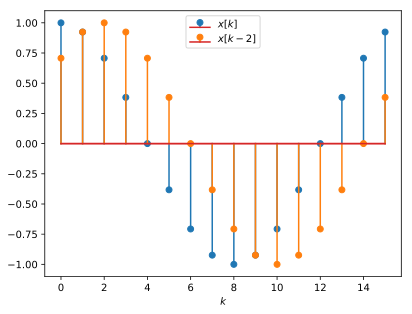

In [3]:
from scipy.linalg import dft

N = 16  # length of signals/DFT
M = 1  # number of periods for cosine
kappa = 2  # shift

# generate signal
W0 = M * 2*np.pi/N
k = np.arange(N)
x = np.cos(W0 * k)

# compute DFT
F = dft(N)
mu = np.arange(N)
X = np.matmul(F, x)

# shift in spectral domain and IDFT
X2 = X * np.exp(-1j * mu * 2*np.pi/N * kappa)
IF = 1/N * np.conjugate(np.transpose(F))
x2 = np.matmul(IF, X2)

# plot signals
plt.stem(k, x, linefmt='C0-', markerfmt='C0o', label='$x[k]$')
plt.stem(k, np.real(x2), linefmt='C1-', markerfmt='C1o', label='$x[k - {}]$'.format(kappa))
plt.xlabel('$k$')
plt.legend(loc=9)

### Multiplication Theorem

The transform of a multiplication of two signals $x[k] \cdot y[k]$ is derived by introducing the signals into the definition of the DFT, expressing the signal $x[k]$ by its spectrum $X[\mu] = \text{IDFT}_N \{ x[k] \}$ and rearranging terms

\begin{align}
\text{DFT}_N \{ x[k] \cdot y[k] \} &= \sum_{k=0}^{N-1} x[k] \cdot y[k] \, w_N^{\mu k} \\
&= \sum_{k=0}^{N-1} \left( \frac{1}{N} \sum_{\nu=0}^{N-1} X[\nu] \, w_N^{-\nu k} \right) y[k] \, w_N^{\mu k} \\
&= \frac{1}{N} \sum_{\nu=0}^{N-1} X[\nu] \sum_{k=0}^{N-1} y[k] \, w_N^{(\mu - \nu) k}  \\
&= \frac{1}{N} \sum_{\nu=0}^{N-1} X[\nu] \cdot Y[\mu - \nu] \\
&= X[\mu] \circledast_N Y[\mu]
\end{align}

where $Y[\mu] = \text{IDFT}_N \{ y[k] \}$ and $k, \mu = 0,1,\dots,N-1$. Note, the last equality follows from the periodicity of the inverse DFT. The DFT of a multiplication of two signals $x[k] \cdot y[k]$ is given by the cyclic convolution of their spectra $X[\mu]$ and $Y[\mu]$ weighted by $\frac{1}{N}$. The cyclic convolution has a period of $N$ and it is performed with respect to the frequency index $\mu$.

Applications of the multiplication theorem include the modulation and windowing of signals. The former leads to the modulation theorem introduced in the following.

### Modulation Theorem

The complex modulation of a signal $x[k]$ is defined as $e^{j \Omega_0 k} \cdot x[k]$ with $\Omega_0 = M \frac{2 \pi}{N}$, $M \in \mathbb{Z}$. The DFT of the modulated signal is derived by applying the multiplication theorem

\begin{equation}
\text{DFT}_N \left\{ e^{j M \frac{2 \pi}{N} k} \cdot x[k] \right\} = \delta[\mu - M]  \circledast_N X[\mu] = X[\mu - M]
\end{equation}

where $X[\mu] = \text{DFT}_N \{ x[k] \}$ and $X[\mu - M]$ denotes the periodic shift of $X[\mu]$.  Above result states that the complex modulation of a signal leads to a periodic shift of its spectrum. This result is known as modulation theorem.

**Example - Decimation of a signal**

An example for the application of the modulation theorem is the [downsampling/decimation](https://en.wikipedia.org/wiki/Decimation_(signal_processing)) of a discrete signal $x[k]$. Downsampling refers to lowering the sampling rate of a signal. The example focuses on the special case of removing every second sample, hence halving the sampling rate. The downsampling is modeled by defining a signal $x_\frac{1}{2}[k]$ where every second sample is set to zero

\begin{equation}
x_\frac{1}{2}[k] = \begin{cases} 
x[k] & \text{for even } k \\
0 & \text{for odd } k
\end{cases}
\end{equation}

In order to derive the spectrum $X_\frac{1}{2}[\mu] = \text{DFT}_N \{ x_\frac{1}{2}[k] \}$ for even $N$, the signal $u[k]$ is introduced where every second sample is zero

\begin{equation}
u[k] = \frac{1}{2} ( 1 + e^{j \pi k} ) = \begin{cases} 1 & \text{for even } k \\
0 & \text{for odd } k \end{cases}
\end{equation}

Using $u[k]$, the process of setting every second sample of $x[k]$ to zero can be expressed as

\begin{equation}
x_\frac{1}{2}[k] = u[k] \cdot x[k]
\end{equation}

Now the spectrum $X_\frac{1}{2}[\mu]$ is derived by applying the multiplication theorem and introducing the [DFT of the exponential signal](definition.ipynb#Transformation-of-the-Exponential-Signal). This results in

\begin{equation}
X_\frac{1}{2}[\mu] = \frac{1}{N} \left(  \frac{N}{2} \delta[\mu] + \frac{N}{2} \delta[\mu - \frac{N}{2}]  \right) \circledast X[\mu] =
\frac{1}{2} X[\mu] + \frac{1}{2} X[\mu - \frac{N}{2}]
\end{equation}

where $X[\mu] = \text{DFT}_N \{ x[k] \}$. The spectrum $X_\frac{1}{2}[\mu]$ consists of the spectrum of the original signal $X[\mu]$ superimposed by the shifted spectrum $X[\mu - \frac{N}{2}]$ of the original signal. This may lead to overlaps that constitute aliasing. In order to avoid aliasing, the spectrum of the signal $x[k]$ has to be band-limited to $0 < \mu < \frac{N}{2}$ before downsampling.

The decimation of a complex exponential signal is illustrated in the following. The signal $x[k] = \cos (\Omega_0 k)$ is decimated by setting every second sample to zero. The DFT of the original signal and decimated signal is computed and their magnitudes are plotted for illustration.

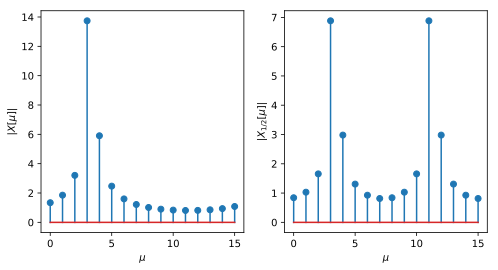

In [4]:
N = 16  # length of signals/DFT
M = 3.3  # number of periods for cosine

W0 = M*2*np.pi/N
k = np.arange(N)
x = np.exp(1j*W0*k)
x2 = np.copy(x)
x2[::2] = 0

F = dft(N)
X = np.matmul(F, x)
X2 = np.matmul(F, x2)

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.stem(abs(X))
plt.xlabel('$\mu$')
plt.ylabel(r'|$X[\mu]$|')

plt.subplot(1,2,2)
plt.stem(abs(X2))
plt.xlabel('$\mu$')
plt.ylabel(r'|$X_{1/2}[\mu]$|');

**Exercise**

* What happens in the spectrum of the downsampled signal if you set $M > \frac{N}{2}$?

### Parseval's Theorem

[Parseval's theorem](https://en.wikipedia.org/wiki/Parseval's_theorem) relates the energy of a discrete signal to its spectrum. The squared absolute value of a signal $x[k]$ represents its instantaneous power. It can be expressed as

\begin{equation}
| x[k] |^2 = x[k] \cdot x^*[k]
\end{equation}

where $x^*[k]$ denotes the complex conjugate of $x[k]$. It is assumed in the following that the signal $x[k]$ is causal and of finite length $N$ or periodic with perodid $N$. Transformation of the right-hand side and application of the multiplication theorem results in

\begin{equation}
\text{DFT}_N \{ x[k] \cdot x^*[k] \} = \frac{1}{N} \cdot X[\mu] \circledast_{N} X^*[N -\mu]
\end{equation}

Introducing the definition of the DFT and the cyclic convolution yields

\begin{equation}
\sum_{k = 0}^{N-1} x[k] \cdot x^*[k] \, w_N^{\mu k}  =
\frac{1}{N} \sum_{\nu = 0}^{N-1} \tilde{X}[\nu] \cdot \tilde{X}^*[N-\mu-\nu]
\end{equation}

Setting $\mu = 0$ followed by the substitution $\nu = \mu$ yields Parseval's theorem

\begin{equation}
\sum_{k = 0}^{N-1} | x[k] |^2 = \frac{1}{N} \sum_{\nu = 0}^{N-1} |X[\mu]|^2 
\end{equation}

The sum over the samples of the squared magnitude of the signal $x[k]$ is equal to the sum over its squared magnitude spectrum divided by $N$. Since the left-hand side represents the energy $E$ of the signal $x[k]$, Parseval's theorem states that the energy can be computed alternatively in the spectral domain by summing over the squared magnitude values of the spectrum.

**Copyright**

The notebooks are provided as [Open Educational Resource](https://de.wikipedia.org/wiki/Open_Educational_Resources). Feel free to use the notebooks for your own educational purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Lecture Notes on Signals and Systems* by Sascha Spors.